<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Need)</span></div>

## 1 Random Numbers

### 1.1 Real and Pseudo Random Numbers

Random number generators have to rely on random physical processes like radioactivity or circuit noise. But since algorithms cannot measure these things, they can only approximate random number generators. These algorithms are hence called Pseudo Random Number Generations (PRNG).

### 1.2 NumPy’s PRNG

In [29]:
import numpy as np
from numpy import random as rng

In [2]:
rng.rand(10)

array([0.35879712, 0.92811273, 0.11690819, 0.05102843, 0.77013121,
       0.83166366, 0.22505659, 0.66383303, 0.75839615, 0.91377642])

In [3]:
rng.rand(5,2)

array([[0.48030123, 0.96599964],
       [0.79184007, 0.5651594 ],
       [0.94090183, 0.74598181],
       [0.82127141, 0.48235353],
       [0.63876197, 0.70031465]])

In [4]:
n = 1000000
random_numbers = rng.rand(n)

In [5]:
np.sum(random_numbers < .5)/n * 100

49.9882

In [6]:
np.sum(random_numbers <.25) /n*100

25.0038

In [7]:
np.sum(random_numbers>.75)/n*100

24.9716

### 1.3 A simple graphical test

In [8]:
from matplotlib import pyplot as plt

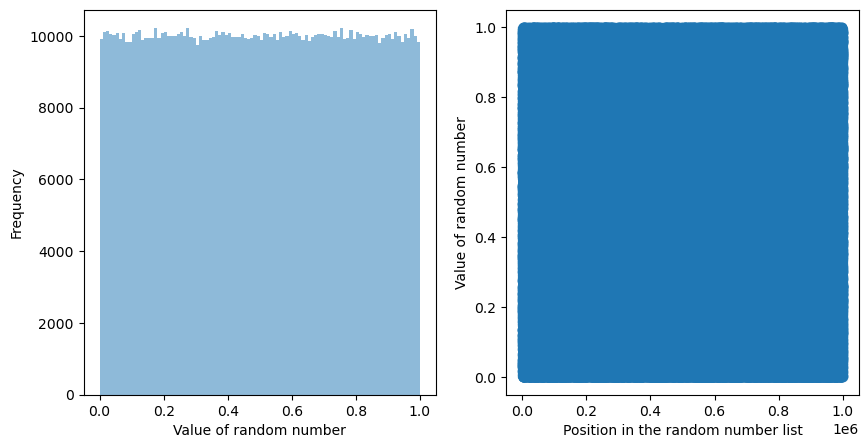

In [9]:
n = 1000000
random_numbers = rng.rand(n)

fig, ax = plt.subplots(nrows=1, ncols = 2, figsize = (10, 5))

axis = ax[0]
axis.hist(random_numbers, bins = 100, alpha = .5)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha = .5)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

plt.show()

### 1.4 Uniformly beyond \([0,1)\)

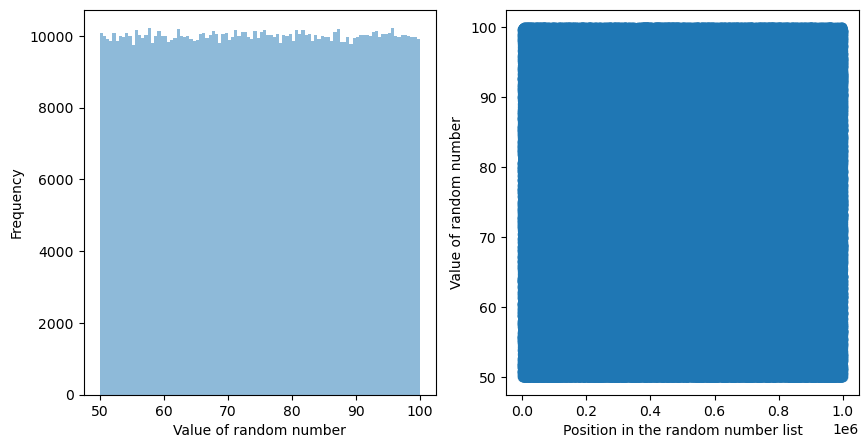

In [10]:
n = 1000000
random_numbers = rng.uniform(low = 50, high = 100, size = n)

fig, ax = plt.subplots(nrows=1, ncols = 2, figsize = (10, 5))

axis = ax[0]
axis.hist(random_numbers, bins = 100, alpha = .5)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha = .5)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

plt.show()

### 1.5 ‘seeding’ a PRNG

In [11]:
for i in range(5):
    #no explicit seed, therefore the algorithm will use a default one
    print(rng.randint(0,100,10))

[87 61 50 44 79 11 65 74 74 81]
[24 57 23 91 94 56  8 64 11 87]
[56 41 29 13 48 97 11 15 45 85]
[30 45 73 30 62 97 67 53 11  7]
[ 8 41 59 17 61 48 35 26 30 28]


In [12]:
for i in range(5):
    rng.seed(4)
    print(rng.randint(0,100,10))

[46 55 69  1 87 72 50  9 58 94]
[46 55 69  1 87 72 50  9 58 94]
[46 55 69  1 87 72 50  9 58 94]
[46 55 69  1 87 72 50  9 58 94]
[46 55 69  1 87 72 50  9 58 94]


## 2 Simulating a Magic-8 Ball

In [13]:
def shake_magic_8():
    '''
    Function to simulate a Magic-8 ball!
    '''
    options = ['It is certain.', 'It is decidedly so.',
               'Without a doubt.', 'Yes definitely.',
               'You may rely on it.', 'As I see it, yes.',
               'Most likely.', 'Outlook good.',
               'Yes.', 'Signs point to yes.',
               'Reply hazy, try again.', 'Ask again later.',
               'Better not tell you now.', 'Cannot predict now.',
               'Concentrate and ask again.', 'Don\'t count on it.',
               'My reply is no.', 'My sources say no.',
               'Outlook not so good.', 'Very doubtful.']

    return np.random.choice(options)

print(shake_magic_8())

Yes.


## 3 Flipping Coins

### 3.1 A fair coin

In [14]:
print(rng.choice(["Heads","Tails"]))


Heads


In [15]:
print(rng.choice(["Heads","Tails"], 10))

['Heads' 'Heads' 'Heads' 'Heads' 'Heads' 'Heads' 'Tails' 'Heads' 'Tails'
 'Tails']


In [16]:
def flip_coins(num=1, prob=.5):
    results = rng.rand(num)
    num_of_heads = np.sum(results > prob)
    return num_of_heads
    #return f'Out of {num} coin flips, you flipped {num_of_heads} heads, or {num_of_heads/num*100}%!'
print(flip_coins(10000))

5027


### 3.2 A biased coin

In [17]:
#to make a biased coin

print(flip_coins(100000, .3))

69927


### 3.3 A flipping experiment

In [18]:
repeat_num = 100000
result = [flip_coins(10) for i in range(repeat_num)]
heads_num, heads_count = np.unique(result, return_counts = True)
#np.unique returns how many unique values are found within an array
#with return_counts = True, it also tells you how many copies of a unique value are found

print(heads_num)
print(heads_count)

[ 0  1  2  3  4  5  6  7  8  9 10]
[  105   990  4365 11781 20811 24427 20306 11789  4371   951   104]


In [81]:
heads_prob = np.round(heads_count/repeat_num, 3)
print(heads_prob)

[0.001 0.01  0.044 0.118 0.208 0.244 0.203 0.118 0.044 0.01  0.001]


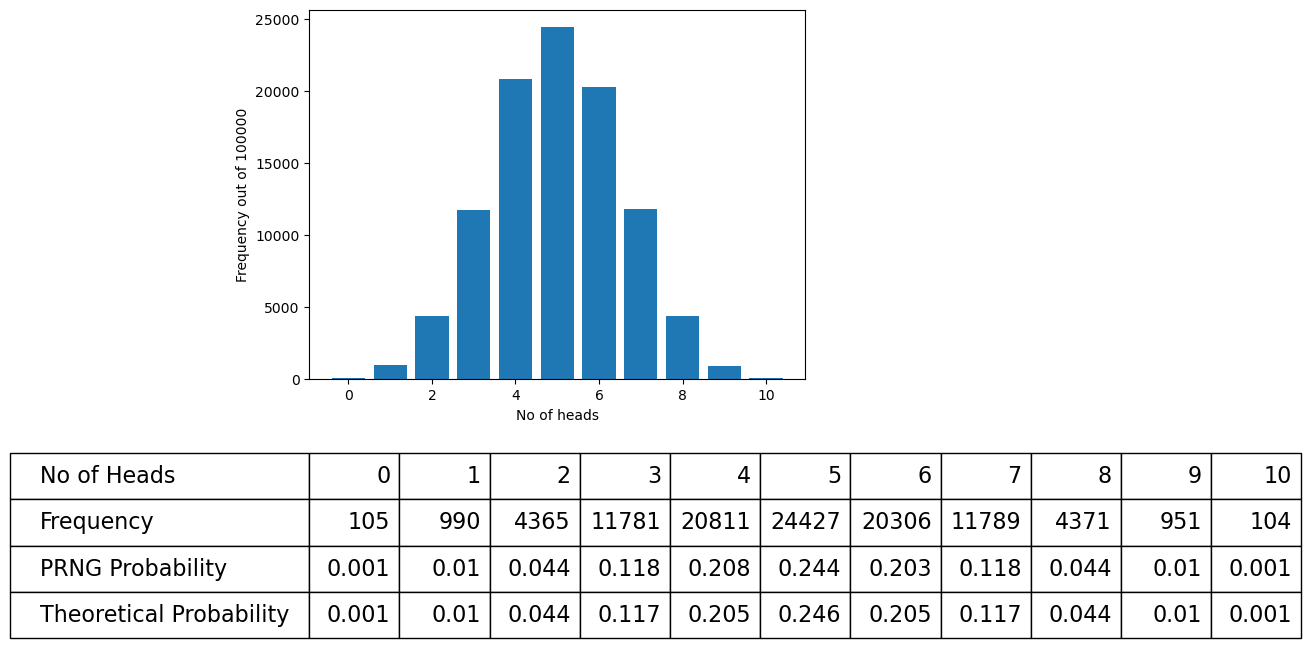

In [82]:
plt.bar(heads_num, heads_count)
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {repeat_num}')
a = plt.table([heads_num, heads_count, heads_prob, binomial_probabilities],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability', "Theoretical Probability"],
          loc='bottom',
          bbox=([0, -.7, 2, .5]))
a.auto_set_font_size(False)
a.set_fontsize(16)
plt.show()

In [48]:
from scipy.stats import binom

In [22]:
binom.pmf(k=7, n=10, p = .5)

0.11718749999999999

In [79]:
binomial_probabilities = np.round(binom.pmf(k=heads_num, n=10, p=.5), 3)
print(binomial_probabilities)

[0.001 0.01  0.044 0.117 0.205 0.246 0.205 0.117 0.044 0.01  0.001]


## Exercise 1 :  12C, 13C

In [141]:
# 12C has an abundance of 98.89%
# 13C has an abundance of 1.11%

def cholesterol_multiverse(repeats = 1, num=1):
    def generate_carbon(num = 1):
        carbons = rng.rand(num)
        num_12c = np.sum(carbons <0.9889)
        num_13c = np.sum(carbons >0.9889)
        return (num_12c, num_13c)
    values = []
    for i in range(repeats):
        values.append(generate_carbon(num))
    return values
#Cholesterol (C27H44O) has 27 carbons
# Let's sample 100000 molecules of cholesterol
result = np.array(cholesterol_multiverse(100000, 27))


mean_of_13c = np.sum(result[:,1])/len(result)
std_of_13c = np.std(result[:,1])
print(f'The mean number of 13C in a cholesterol molecule is {mean_of_13c}')
print(f'The standard deviation of the number of 13C in a cholesterol molecule\nis {std_of_13c}')

none_13c_cholesterol = np.sum(result[:,1]==0)
print(f'The probability that a cholesterol molecule has no atoms of 13C is {none_13c_cholesterol/len(result)*100}%')

The mean number of 13C in a cholesterol molecule is 0.30138
The standard deviation of the number of 13C in a cholesterol molecule
is 0.5449679766738591
The probability that a cholesterol molecule has no atoms of 13C is 73.797%
